In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.math import maximum as tfmax
import tensorflow as tf
import ysnnutil as yut
nb='nb00B'
wFile='./'+nb+'_fitHill'
fSxySections='./'+nb+'_SxySections.png'
fSigma='./'+nb+'_Sigma.png'
fRval='./'+nb+'_rVal.png'
fOrtoSymm='./'+nb+'_OrthoSymm.png'
fConvex='./'+nb+'_Convex.png'

2023-06-10 10:06:10.176444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-10 10:06:10.176502: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
nun=30
model=keras.Sequential([
layers.Dense(2*nun,activation="relu",),
layers.Dense(nun,activation="relu",),
layers.Dense(nun,activation="relu",),
layers.Dense(nun,activation="relu",),
layers.Dense(1,)
])
model.load_weights(wFile, skip_mismatch=False, by_name=False, options=None)

2023-06-10 10:06:13.590020: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-10 10:06:13.590097: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-10 10:06:13.590130: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f196a007e77d): /proc/driver/nvidia/version does not exist


i =  0  sxy =  0.0
i =  1  sxy =  0.12913266227921802
i =  2  sxy =  0.19369899341882704
i =  3  sxy =  0.25826532455843604
i =  4  sxy =  0.32283165569804506
i =  5  sxy =  0.3873979868376541
i =  6  sxy =  0.45196431797726305
i =  7  sxy =  0.5165306491168721
i =  8  sxy =  0.5810969802564812
i =  9  sxy =  0.6295217286111878
i =  10  sxy =  0.6392066782821292
i =  11  sxy =  0.6443719847732979


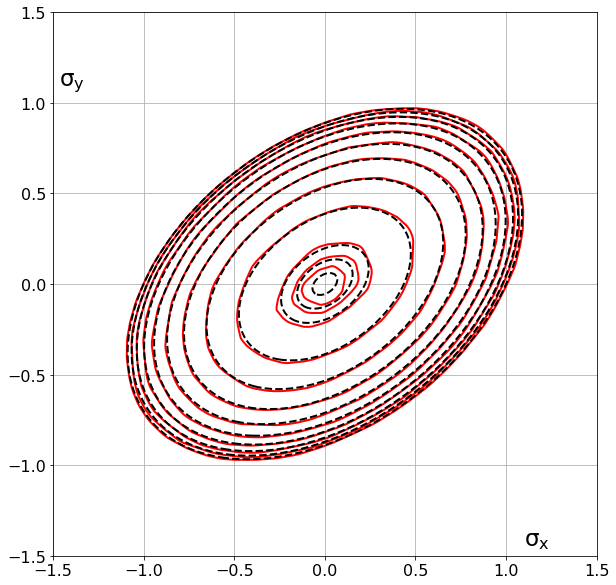

In [ ]:
### Aluminum alloy AA6022-T4 r-values: r0=0.8; r45=0.37; r90=0.54
a1,a2,a3=yut.paramHill([0.8,0.37,0.54])

npt=200
vsx=np.linspace(-1.5,1.5,npt)
vsy=np.linspace(-1.5,1.5,npt)
maxSXY=1.0/np.sqrt(a3)
#vsxy=[0.0]
vsxy=maxSXY*np.array([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.975,0.99,0.998])
X,Y=np.meshgrid(vsx,vsy)
X,Y=X.reshape((npt*npt,1)),Y.reshape((npt*npt,1))
vp=np.zeros((npt*npt,3))
vp[:,0]=X[:,0];vp[:,1]=Y[:,0]
fg2=plt.figure(figsize=(10,10))
ax2=fg2.add_subplot()
for ii,sxy in enumerate(vsxy):
    vp[:,2]=sxy
    vz=model(vp)
    vzHill=yut.ysHill(vp[:,0],vp[:,1],vp[:,2],a1,a2,a3)
    print('i = ',ii, ' sxy = ',sxy)
    ax2.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linewidths=2,colors=['r'])
    ax2.contour(vsx,vsy,vzHill.reshape((npt,npt)),levels=[1.0],linewidths=2,linestyles='--',colors=['k'])
ax2.grid()
ax2.set_aspect('equal')
ax2.tick_params(axis='both', which='major', labelsize=16)
y1,y2=ax2.get_ylim()
ax2.text(x=1.1,y=y1+0.02*(y2-y1),s=r'$\mathregular{\sigma_{x}}$',fontsize=23)
x1,x2=ax2.get_xlim()
ax2.text(x=x1+0.01*(x2-x1),y=1.1,s=r'$\mathregular{\sigma_{y}}$',fontsize=23)
fg2.savefig(fSxySections,bbox_inches='tight',dpi=300,facecolor='w')
plt.show()

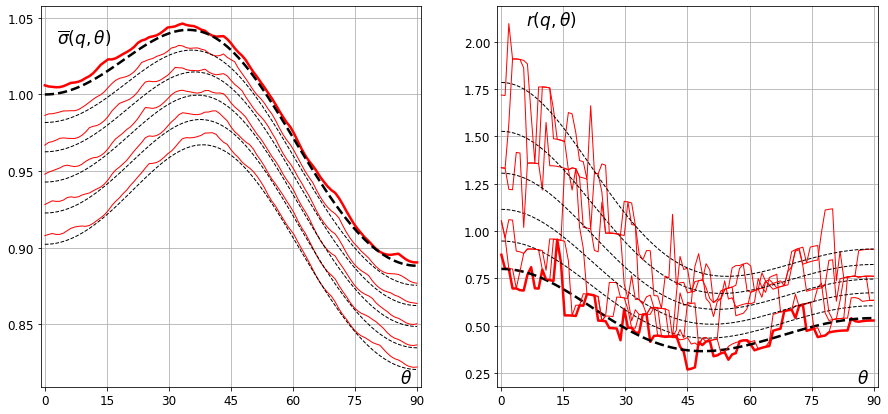

In [ ]:
Nq=6
vq=np.linspace(0,-0.2,Nq) ###; print(vq)
vLW=np.ones(Nq);vLW[0]=2.5
Nphi=101
vphi=np.linspace(0,np.pi/2,Nphi);vDegs=180.0*(vphi/np.pi)
vcos=np.cos(vphi);vsin=np.sin(vphi)
vcos2,vsin2,vsc=vcos*vcos,vsin*vsin,vcos*vsin
#vsx,vsy,vsxy=np.zeros(Nphi),np.zeros(Nphi),np.zeros(Nphi)
vS,vR, mxS,mnS = np.zeros(Nphi),np.zeros(Nphi), -1.0, 100.0
vSnn,vRnn = np.zeros(Nphi),np.zeros(Nphi)
linestyle1,linestyle2='--','-'
fg=plt.figure(figsize=(15,7))
ax1=fg.add_subplot(1,2,1)
ax2=fg.add_subplot(1,2,2)
fgS,fgR=plt.figure(),plt.figure()
axS,axR=fgS.add_subplot(),fgR.add_subplot()
for kq in range(Nq):
    q=vq[kq]
    for k in range(Nphi):
        vsx=vcos2[k]+q*vsin2[k]
        vsy=vsin2[k]+q*vcos2[k]
        vsxy=(1.0-q)*vsc[k]
        yf,[vDX,vDY,vDXY]=yut.fGYF_Hill(vsx,vsy,vsxy,[a1,a2,a3])
        vR[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
        vS[k]=1.0/yf
        vp=np.array([vsx,vsy,vsxy]).reshape((1,3))
        x = tf.convert_to_tensor(vp, dtype=tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(x)
            yf = model(x)
        vSnn[k]=1.0/yf
        ##print(tape.gradient(yf, x))
        vDX,vDY,vDXY = tape.gradient(yf, x)[0]
        vRnn[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
    ax2.plot(vDegs,vRnn,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    ax2.plot(vDegs,vR,linestyle=linestyle1,linewidth=vLW[kq],color='k')
    ax1.plot(vDegs,vSnn,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    ax1.plot(vDegs,vS,linestyle=linestyle1,linewidth=vLW[kq],color='k')
    axR.plot(vDegs,vRnn,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    axR.plot(vDegs,vR,linestyle=linestyle1,linewidth=vLW[kq],color='k')
    axS.plot(vDegs,vSnn,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    axS.plot(vDegs,vS,linestyle=linestyle1,linewidth=vLW[kq],color='k')
thetaTicks=[0,15,30,45,60,75,90]
thetaLabels=['0','15','30','45','60','75','90']
ax1.set_xticks(thetaTicks,minor=False)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True)
ax2.set_xticks(thetaTicks,minor=False)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True)
ax2.set_xlim([-1,91])
y1,y2=ax2.get_ylim()
tsx,trx=3,6
ax2.text(86,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
ax2.text(trx,y2-0.05*(y2-y1),r'$r(q,\theta)$',fontsize=17)
ax1.set_xlim([-1,91])
y1,y2=ax1.get_ylim()
ax1.text(86,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
ax1.text(tsx,y2-0.1*(y2-y1),r'$\overline{\sigma}(q,\theta)$',fontsize=17)
###fg.savefig('./nb06_Sigma_Rval.png',bbox_inches='tight',dpi=300,facecolor='w')
axS.set_xticks(thetaTicks,minor=False)
axS.tick_params(axis='both', which='major', labelsize=12)
axS.grid(True)
axR.set_xticks(thetaTicks,minor=False)
axR.tick_params(axis='both', which='major', labelsize=12)
axR.grid(True)
axR.set_xlim([-1,91])
y1,y2=axR.get_ylim()
axR.text(86,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
axR.text(trx,y2-0.05*(y2-y1),r'$r(q,\theta)$',fontsize=17)
axS.set_xlim([-1,91])
y1,y2=axS.get_ylim()
axS.text(86,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
axS.text(tsx,y2-0.1*(y2-y1),r'$\overline{\sigma}(q,\theta)$',fontsize=17)
fgS.savefig(fSigma,bbox_inches='tight',dpi=300,facecolor='w')
fgR.savefig(fRval,bbox_inches='tight',dpi=300,facecolor='w')
plt.close(fgS);plt.close(fgR)
plt.show()

In [ ]:
### numerical estimates (Euclidean distances) of the approximation of the directional properties
Nq=6
vq=np.linspace(0,-0.2,Nq)
Nphi=14
vphi=np.linspace(0,np.pi/2,Nphi);vDegs=180.0*(vphi/np.pi)
vcos=np.cos(vphi);vsin=np.sin(vphi)
vcos2,vsin2,vsc=vcos*vcos,vsin*vsin,vcos*vsin
vS,vR = np.zeros(Nphi),np.zeros(Nphi)
vSnn,vRnn = np.zeros(Nphi),np.zeros(Nphi)
for kq in range(Nq):
    q=vq[kq]
    for k in range(Nphi):
        vsx=vcos2[k]+q*vsin2[k]
        vsy=vsin2[k]+q*vcos2[k]
        vsxy=(1.0-q)*vsc[k]
        yf,[vDX,vDY,vDXY]=yut.fGYF_Hill(vsx,vsy,vsxy,[a1,a2,a3])
        vR[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
        vS[k]=1.0/yf
        vp=np.array([vsx,vsy,vsxy]).reshape((1,3))
        x = tf.convert_to_tensor(vp, dtype=tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(x)
            yf = model(x)
        vSnn[k]=1.0/yf
        ##print(tape.gradient(yf, x))
        vDX,vDY,vDXY = tape.gradient(yf, x)[0]
        vRnn[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
deltaS=(vS-vSnn)**2
deltaS=np.sqrt(np.sum(deltaS))
deltaR=(vR-vRnn)**2
deltaR=np.sqrt(np.sum(deltaR))
print('deltaS = ',deltaS,'\ndeltaR = ',deltaR)

deltaS =  0.016052925277466774 
deltaR =  0.4044301725793975


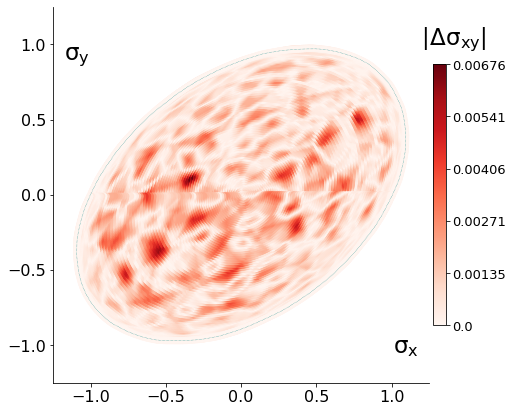

In [ ]:
### Check the orthotropic symmetry gap
vp=yut.genSpherePointsTop(300).astype(np.float32)
yf=model(vp);rhoA=1.0/yf
vp[:,2]=-vp[:,2]
yf=model(vp);rhoB=1.0/yf
drho=np.abs((rhoA[:,0]-rhoB[:,0])*(-vp[:,2]))
fgg=plt.figure(figsize=(8,8))
axx=fgg.add_subplot()
axx.set_aspect('equal')
axx.spines[['right', 'top']].set_visible(False)
spl=axx.scatter(rhoA[:,0]*vp[:,0],rhoA[:,0]*vp[:,1],c=drho,cmap='Reds')
cbticks=np.linspace(0,np.max(drho),6)
cbar=fgg.colorbar(spl,ax=axx, shrink=0.6,pad=0.0075,location='right')
##cbar.ax.set_title(r'$\left|\mathregular{\sigma_{xy}^T-\sigma_{xy}^B}\right|$',fontsize=23)
cbar.ax.set_title(r'$\,\,\,\,\,\,\,\,\left|\mathregular{\Delta\sigma_{xy}}\right|$',fontsize=23,pad=20)
cbar.set_ticks(cbticks);cbar.set_ticklabels([str(round(x,5)) for x in cbticks])
cbar.ax.tick_params(labelsize=13)
axx.tick_params(axis='both', which='major', labelsize=16)
y1,y2=axx.get_ylim()
x1,x2=axx.get_xlim()
axx.text(x=x2-0.08*(x2-x1),y=y1+0.01*(y2-y1),s=r'$\mathregular{\sigma_{x}}$',fontsize=23)
axx.text(x=x1+0.01*(x2-x1),y=y2-0.08*(y2-y1),s=r'$\mathregular{\sigma_{y}}$',fontsize=23)
npt=100
vsx=np.linspace(-1.25,1.25,npt)
vsy=np.linspace(-1.25,1.25,npt)
vsxy=maxSXY*np.array([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.975,0.99,0.998])
X,Y=np.meshgrid(vsx,vsy)
npt2=npt*npt
X,Y=X.reshape((npt2,1)),Y.reshape((npt*npt,1))
vp=np.zeros((npt*npt,3))
vp[:,0]=X[:,0];vp[:,1]=Y[:,0]
vz=model(vp)
axx.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linestyles='dotted',linewidths=0.5,colors=[(255,125,125)])
fgg.savefig(fOrtoSymm,bbox_inches='tight',dpi=300,facecolor='w')
plt.show()

In [ ]:
### Look at the coefficients of the quadratic: The last two should be close to zero
#ww=model.get_weights();print(ww)
ww=model.layers[0].weights[0].numpy()
#print(model.layers[1].weights)
nNodes=ww.shape[1]
c11,c22,c33,c12,c13,c23=[0.0 for k in range(6)]
for k in range(nNodes):
    c11+=ww[0,k]*ww[0,k]
    c22+=ww[1,k]*ww[1,k]
    c33+=ww[2,k]*ww[2,k]
    c12+=ww[0,k]*ww[1,k]
    c13+=ww[0,k]*ww[2,k]
    c23+=ww[1,k]*ww[2,k]
print('coeff of s_x*s_x = ', c11)
print('coeff of s_y*s_y = ', c22)
print('coeff of s_xy*s_xy = ', c33)
print('coeff of s_x*s_y = ', 2.0*c12)
print('coeff of s_x*s_xy = ', 2.0*c13)
print('coeff of s_y*s_xy = ', c23)

coeff of s_x*s_x =  1.9274986312002227
coeff of s_y*s_y =  2.02324006186989
coeff of s_xy*s_xy =  2.6849191463261377
coeff of s_x*s_y =  -0.7132216018362669
coeff of s_x*s_xy =  -0.17358291472191922
coeff of s_y*s_xy =  -0.21768353800507612


In [ ]:
### Verify convexity
if(0):## Hessian = 0, for ReLU
    ##generate points on the unit sphere
    vp=yut.genPointsCvxCheckOpt(10**5).astype(np.float32)
    ncp=vp.shape[0]

    ##calculate value, gradient and hessian
    x1=tf.Variable(vp[:,0],name='x1',trainable=False)
    x2=tf.Variable(vp[:,1],name='x2',trainable=False)
    x3=tf.Variable(vp[:,2],name='x3',trainable=False)

    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch([x1,x2,x3])
        with tf.GradientTape() as tape1:
            tape1.watch([x1,x2,x3])
            vy=model(tf.stack([x1,x2,x3],axis=1))
        g1,g2,g3=tape1.gradient(vy,[x1,x2,x3])
        idx=np.argwhere(vp[:,2]>=-1.0e-12)
        vp=vp[idx[:,0]]
        vpy=model(vp)


    h11=tape2.gradient(g1,x1,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
    h12=tape2.gradient(g1,x2,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
    h13=tape2.gradient(g1,x3,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
    h22=tape2.gradient(g2,x2,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
    h23=tape2.gradient(g2,x3,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
    h33=tape2.gradient(g3,x3,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()

    vy=vy.numpy().reshape((ncp,1))
    vG=np.column_stack((g1.numpy(),g2.numpy(),g3.numpy()))
    vH=np.column_stack((h11,h12,h13,h22,h23,h33))
    print('shapes of vals, grad, hess: ', vy.shape,vG.shape,vH.shape)

    nnHom=1
    KG=yut.HomN_GaussCheck(vy,vG,vH,nnHom)
    print('min KG = ',np.min(KG))
    print('max KG = ',np.max(KG))

    ncp=vp.shape[0]
    vpy=vpy.numpy().reshape((ncp,1))
    vpy=vpy**(1.0/nnHom)
    nKG=idx.shape[0]
    KG=KG[idx[:,0]] #;KG/=np.max(KG)
    idx=np.argwhere(KG<0)
    KG=np.ones(nKG)
    KG[idx[:,0]]=-1
    if(1):
        fg3=plt.figure(figsize=(8,8))
        ax=fg3.add_subplot()
        ax.set_aspect('equal')
        ax.spines[['right', 'top']].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=16)
        spl=ax.scatter(vp[:,0]/vpy[:,0],vp[:,1]/vpy[:,0],c=KG, cmap='seismic')
        cbar=fg3.colorbar(spl,ax=ax, shrink=0.6,pad=0.0075,location='right')
        #cbar.ax.set_ylim(-2.0, 10.0)
        #cbar.outline.set_visible(False)
        #vticks=np.linspace(np.min(KG),np.max(KG),6)
        #cbar.set_ticks(vticks)
        #cbar.set_ticklabels([str(round(x,2)) for x in vticks],fontsize=11)
        vticks=[-0.5,0.5]
        cbar.set_ticks(vticks)
        cbar.set_ticklabels([r'$\mathregular{<0}$',r'$\mathregular{\geq 0}$'],fontsize=18)
        ##cbar.ax.set_title(r'$\mathregular{\sigma_{xy}}$',fontsize=15)
        cbar.ax.set_title(r'$\,\,\mathregular{K_G}$',fontsize=18)
        fg3.savefig(fConvex,bbox_inches='tight',dpi=300,facecolor='w')
        plt.show()
    del tape2
else:
    print('Hessian = 0, for ReLU')

Hessian = 0, for ReLU


In [1]:
gColab=True  ## set this to False if running locally
if(gColab):
    ## Mount google drive to the machine running this nb
    from google.colab import drive
    drive.mount('/content/drive')
    ## must also specify the absolute path to the working dir
    wdir='/content/drive/MyDrive/ysNN/partA/'
    !jupyter nbconvert --to html  {wdir+'nb00B_Valid.ipynb'}

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/MyDrive/ysNN/partA/nb00B_Valid.ipynb to html
[NbConvertApp] Writing 1183577 bytes to /content/drive/MyDrive/ysNN/partA/nb00B_Valid.html
